In [1]:
# importing basic libraries
import numpy as np
import pandas as pd

# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving employee.csv to employee (1).csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['employee.csv']))

In [5]:
# lets take only 200 rows as we are only going to visualize it
data=data.loc[:199,:]
print(data.shape)

(200, 35)


In [6]:
# lets check the structure of the dataset using the Head function

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

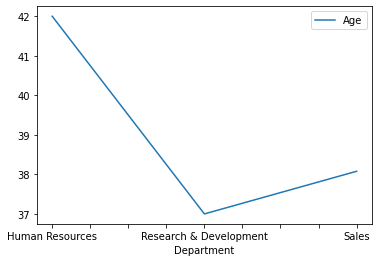

In [8]:
x = data.pivot_table(index = 'Department',
                     values = 'Age',
                     aggfunc = 'mean').plot(kind='line')

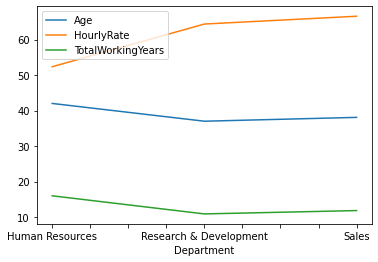

In [9]:
x = data.pivot_table(index = 'Department',
                     values = ['Age','TotalWorkingYears','HourlyRate'],
                     aggfunc = 'mean').plot(kind='line')

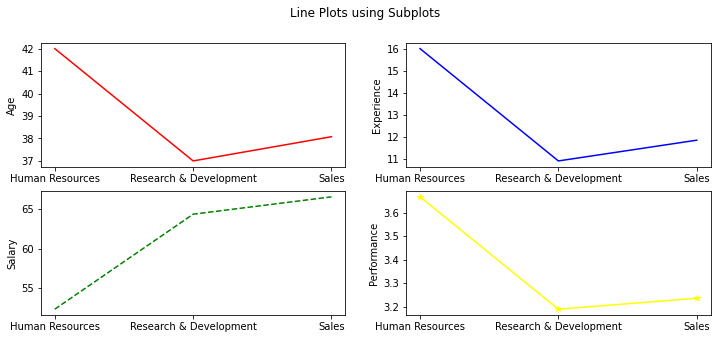

In [10]:
# Trying to plot line plots in different plots Using Subplots

plt.rcParams['figure.figsize'] = (12, 5)

plt.subplot(221)
x = data.pivot_table(index = 'Department',
                     values = ['Age'],
                     aggfunc = 'mean')
plt.plot(x,color='red')
plt.ylabel('Age')

plt.subplot(222)
y = data.pivot_table(index = 'Department',
                     values = ['TotalWorkingYears'],
                     aggfunc = 'mean')
plt.plot(y, color = 'blue')
plt.ylabel('Experience')

plt.subplot(223)
z = data.pivot_table(index = 'Department',
                     values = ['HourlyRate'],
                     aggfunc = 'mean')
plt.plot(z,'--', color ='green')
plt.ylabel('Salary')

plt.subplot(224)
a = data.pivot_table(index = 'Department',
                     values = ['PerformanceRating'],
                     aggfunc = 'mean')
plt.plot(a,'-*', color = 'yellow')
plt.ylabel('Performance')

plt.suptitle('Line Plots using Subplots')
plt.show()


In [11]:
#BoxPlots
# here we are using value_counts() which return the values related to each of the categories present in the attribute
x = data['Attrition'].value_counts()

# printing the values
print(x)

No     170
Yes     30
Name: Attrition, dtype: int64


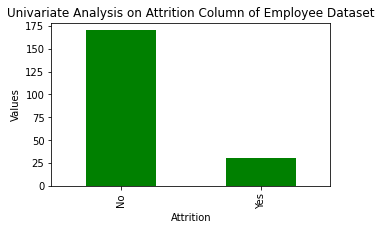

In [12]:
# lets use the the values in x to plot 

plt.rcParams['figure.figsize'] = (5, 3)
x.plot(kind = 'bar', color ='green')

plt.title('Univariate Analysis on Attrition Column of Employee Dataset', fontsize = 12)
plt.xlabel('Attrition')
plt.ylabel('Values')
plt.show()

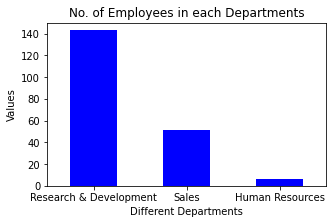

In [13]:
# analyzing the attribute Department

data['Department'].value_counts().plot(kind = 'bar', color = 'blue')
plt.ylabel('Values')
plt.xlabel('Different Departments')
plt.xticks(rotation = 360)
plt.title('No. of Employees in each Departments', fontsize =12)
plt.show()

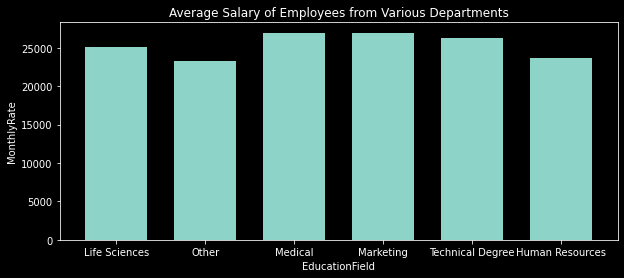

In [14]:
# lets plot Education vs Monthly Rate
#All rc(runtime configuration) settings are stored in a dictionary-like variable called matplotlib.rcParams
plt.rcParams['figure.figsize'] = (10, 4)
with plt.style.context('dark_background'):
 plt.bar(data['EducationField'], data['MonthlyRate'], width = 0.7, align = 'center')
 plt.title('Average Salary of Employees from Various Departments')
 plt.ylabel('MonthlyRate')
 plt.xlabel('EducationField')
plt.show()

In [15]:
# using crosstab funtion, making a cross tabular using multiple variables.
# we have used mean function to aggregate the values of Monthly rate.
# for x axis -> index: Department
# for y axis -> index: Education Field
# values (x X y) -> Monthly Rate, aggreated using mean function

x = pd.crosstab(index = data['Department'],
                columns = data['EducationField'],
                values = data['MonthlyRate'],
                aggfunc = 'mean')
x

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,18355.75,8916.000000,NaN,10425.000000,NaN,NaN
Research & Development,NaN,13771.687500,NaN,13053.540984,12780.375,13551.0
Sales,NaN,14644.684211,14645.952381,18956.833333,17519.000,14198.5


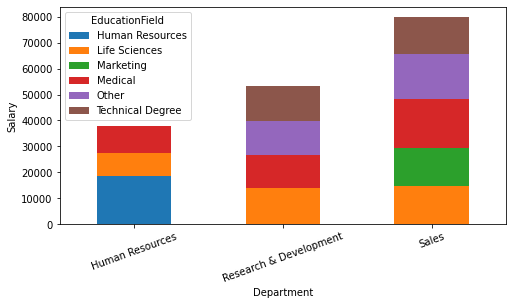

In [16]:
# lets plot a Stacked Bar Chart
# we will use x, which we have created using crosstab function

# setting the size of the plot
plt.rcParams['figure.figsize'] = (8, 4)

# keeping the Stacked option to **True**
x.plot(kind = 'bar', stacked = True)
plt.ylabel('Salary')
plt.xticks(rotation = 20)
plt.show()

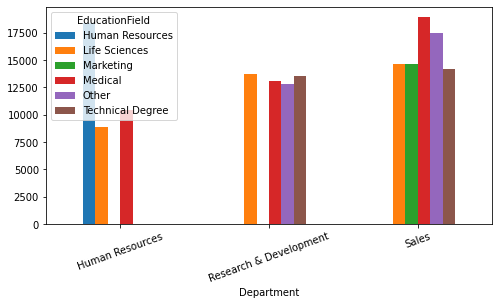

In [17]:
# Lets make a Grouped Bar Plot 
# we will be using the variable x which we have created using the cross tab function

# setting the size of the plot
plt.rcParams['figure.figsize'] = (8, 4)

# keeping the stacked option to **false**
x.plot(kind = 'bar', stacked = False)
plt.xticks(rotation = 20)
plt.show()

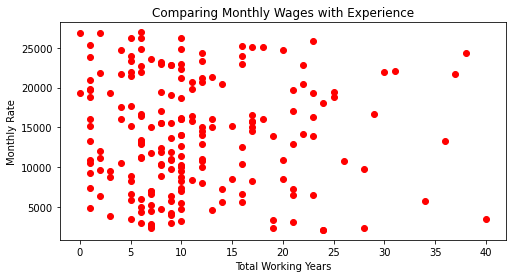

In [18]:
#SCATTER PLOTS
#
plt.scatter( data['TotalWorkingYears'],
            data['MonthlyRate'],
            color = 'red')

# specifying the xlabel, ylabel, and the title of the plot
plt.ylabel('Monthly Rate')
plt.xlabel('Total Working Years')
plt.title('Comparing Monthly Wages with Experience')
plt.show()

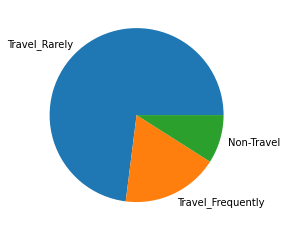

In [19]:
#PIE CHART
plt.pie(data['BusinessTravel'].value_counts(), labels = data['BusinessTravel'].value_counts().index)
plt.show()

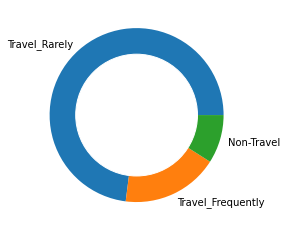

In [20]:
#Making Donut Chart
plt.pie(data['BusinessTravel'].value_counts(), labels = data['BusinessTravel'].value_counts().index)

# lets draw a white circle in the middle of the pie chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

# adding the circle in the plot
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [21]:
import seaborn as sns

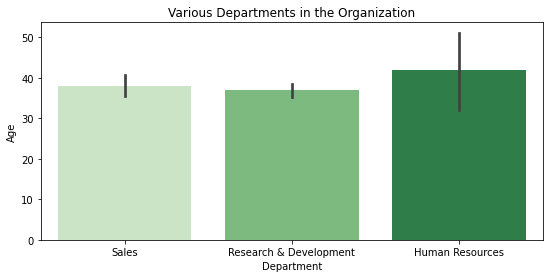

In [22]:
# setting the size of the figure
plt.rcParams['figure.figsize'] = (9, 4)

# plotting a bar chart
sns.barplot(x = data['Department'], 
            y = data['Age'], 
            palette = 'Greens')
plt.title('Various Departments in the Organization')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


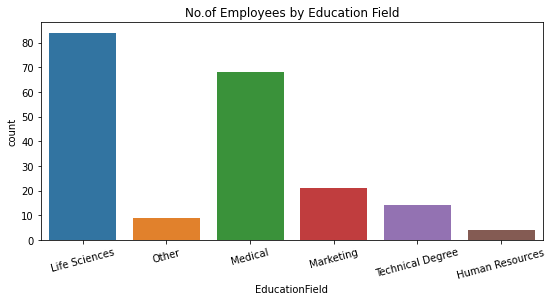

In [23]:
# plotting a simple count plot
sns.countplot(data['EducationField'])
plt.xticks(rotation = 375)
plt.title("No.of Employees by Education Field")
plt.show()

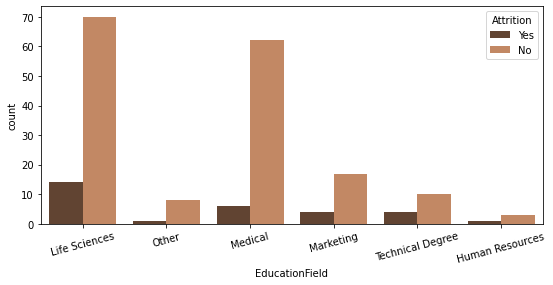

In [24]:
# plotting a count plot with hue
sns.countplot(x = data['EducationField'],
              hue = data['Attrition'],
              palette = 'copper')
plt.xticks(rotation = 375)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


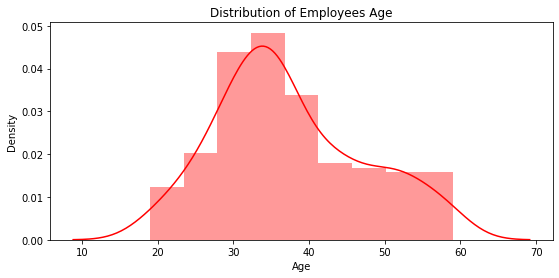

In [25]:
# lets make a simple distribution distribution plot
sns.distplot(data['Age'],
             color = 'red')
plt.title('Distribution of Employees Age')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


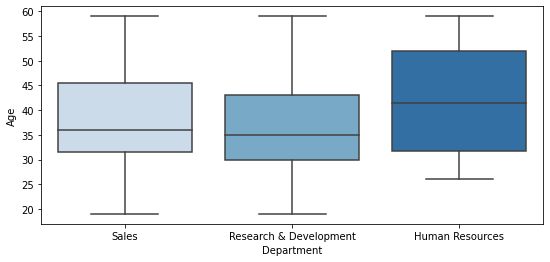

In [26]:
# lets make a simple box plot
sns.boxplot(data['Department'],
            data['Age'],
           palette = 'Blues')
plt.show()

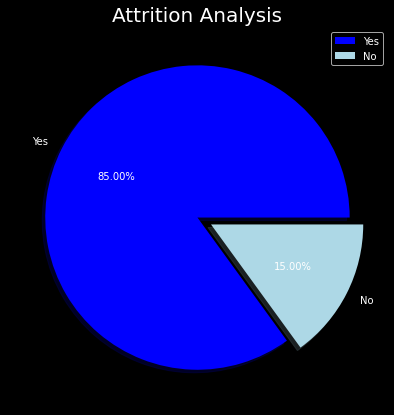

In [27]:
size = data['Attrition'].value_counts()
labels = ['Yes', 'No']
colors = ['Blue', 'lightblue']
explode = [0, 0.1]
, 
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('dark_background')
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Attrition Analysis', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()